In [ ]:
pip install gdal rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 88.2 MB/s eta 0:00:00


In [ ]:
import os
import csv
import requests

BASE_URL = "https://storage.googleapis.com/gcp-public-data-landsat/LC08/01"

def parse_scene_name(scene_name):
    """ Extrae el path y row de un nombre de escena Landsat 8. """
    parts = scene_name.split('_')
    if len(parts) < 3:
        raise ValueError(f"Formato inesperado en el nombre de escena: {scene_name}")
    code = parts[2]  # Ejemplo: "027047"
    if len(code) != 6:
        raise ValueError(f"El campo de path/row no tiene 6 dígitos en: {scene_name}")
    return code[:3], code[3:]

def build_file_urls(scene_name):
    """ Construye las URLs de los archivos para una escena Landsat 8. """
    path, row = parse_scene_name(scene_name)
    base_url = f"{BASE_URL}/{path}/{row}/{scene_name}"
    file_urls = {
        "MTL": f"{base_url}/{scene_name}_MTL.txt"
    }
    for i in range(1, 9):
        file_urls[f"B{i}"] = f"{base_url}/{scene_name}_B{i}.TIF"
    return file_urls

def download_file(url, destination):
    """ Descarga un archivo desde una URL y lo guarda en la ubicación especificada. """
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(destination, "wb") as file:
            for chunk in response.iter_content(1024):
                file.write(chunk)
        print(f"Descargado: {destination}")
    else:
        print(f"Error al descargar {url} - Código {response.status_code}")

def read_scene_names_from_csv(csv_file):
    """ Lee un archivo CSV y obtiene la lista de nombres de escena. """
    scene_names = []
    with open(csv_file, newline='', encoding='utf-8') as f:
        reader = csv.reader(f)
        for row in reader:
            if row and row[0].strip():
                scene_names.append(row[0].strip())
    return scene_names

def download_scene(scene_name, out_dir):
    """ Descarga todos los archivos de una escena Landsat 8. """
    file_urls = build_file_urls(scene_name)
    scene_out_dir = os.path.join(out_dir, scene_name)
    os.makedirs(scene_out_dir, exist_ok=True)

    for file_type, url in file_urls.items():
        dest_file = os.path.join(scene_out_dir, os.path.basename(url))
        download_file(url, dest_file)

def main():
    csv_file = 'scenes.csv'  # CSV con los nombres de escena
    out_dir = 'landsat_scenes'
    os.makedirs(out_dir, exist_ok=True)

    scene_names = read_scene_names_from_csv(csv_file)
    print(f"Escenas encontradas en CSV: {len(scene_names)}")

    for scene in scene_names:
        print(f"Descargando escena: {scene}")
        try:
            download_scene(scene, out_dir)
        except Exception as e:
            print(f"Error descargando {scene}: {e}")

if __name__ == '__main__':
    main()


Escenas encontradas en CSV: 13
Descargando escena: LC08_L1TP_027047_20210501_20210501_01_RT
Descargado: landsat_scenes/LC08_L1TP_027047_20210501_20210501_01_RT/LC08_L1TP_027047_20210501_20210501_01_RT_MTL.txt
Descargado: landsat_scenes/LC08_L1TP_027047_20210501_20210501_01_RT/LC08_L1TP_027047_20210501_20210501_01_RT_B1.TIF
Descargado: landsat_scenes/LC08_L1TP_027047_20210501_20210501_01_RT/LC08_L1TP_027047_20210501_20210501_01_RT_B2.TIF
Descargado: landsat_scenes/LC08_L1TP_027047_20210501_20210501_01_RT/LC08_L1TP_027047_20210501_20210501_01_RT_B3.TIF
Descargado: landsat_scenes/LC08_L1TP_027047_20210501_20210501_01_RT/LC08_L1TP_027047_20210501_20210501_01_RT_B4.TIF
Descargado: landsat_scenes/LC08_L1TP_027047_20210501_20210501_01_RT/LC08_L1TP_027047_20210501_20210501_01_RT_B5.TIF
Descargado: landsat_scenes/LC08_L1TP_027047_20210501_20210501_01_RT/LC08_L1TP_027047_20210501_20210501_01_RT_B6.TIF
Descargado: landsat_scenes/LC08_L1TP_027047_20210501_20210501_01_RT/LC08_L1TP_027047_20210501_2

In [ ]:
def getMTLParameters (MTL):
    '''Parses the given metadata (MTL) text, and returns several independent
parameters.'''

    Mref = []
    Aref = []
    Mrad = []
    Arad = []
    K1 = []
    K2 = []

    MTL = MTL.splitlines()

    for ln in MTL:

        if 'RADIANCE_MULT_BAND_' in ln:
            Mrad.append(float(ln.split(' = ')[1]))
        if 'RADIANCE_ADD_BAND_' in ln:
            Arad.append(float(ln.split(' = ')[1]))
        if 'REFLECTANCE_MULT_BAND_' in ln:
            Mref.append(float(ln.split(' = ')[1]))
        if 'REFLECTANCE_ADD_BAND_' in ln:
            Aref.append(float(ln.split(' = ')[1]))
        if 'K1_CONSTANT_BAND_' in ln:
            K1.append(float(ln.split(' = ')[1]))
        if 'K2_CONSTANT_BAND_' in ln:
            K2.append(float(ln.split(' = ')[1]))

        if 'SUN_ELEVATION' in ln:
            SE = float(ln.split(' = ')[1])

        if 'LANDSAT_SCENE_ID' in ln:
            L8ID = (ln.split(' = ')[1])
        if 'FILE_DATE' in ln:
            FDATE = str(ln.split(' = ')[1])
        if 'DATE_ACQUIRED' in ln:
            DATEAC = str(ln.split(' = ')[1])
        if 'SCENE_CENTER_TIME' in ln:
            SceneTIME = str(ln.split(' = ')[1])
        if 'CLOUD_COVER' in ln:
            CC = float(ln.split(' = ')[1])
        if 'MAP_PROJECTION' in ln:
            MP = str(ln.split(' = ')[1])
        if 'DATUM' in ln:
            DT = str(ln.split(' = ')[1])
        if 'ELLIPSOID' in ln:
            EL = str(ln.split(' = ')[1])
        if 'UTM_ZONE' in ln:
            ZONE = int(ln.split(' = ')[1])

    return Mrad, Arad, Mref, Aref, K1, K2, SE, L8ID, FDATE, DATEAC, SceneTIME, CC, MP, DT, EL, ZONE

In [ ]:
def getReflectance (band, add_band, mult_band, sun_elevation):
    '''A tiny function, used just to compute the reflectances, with correction
for solar angle (given in degrees).'''

    p = ((band * mult_band) + add_band) # TOA planetary reflectance, without correction for solar angle
    corrected = p / math.sin (math.radians (sun_elevation)) # TOA planetary reflectance, with correction for solar angle

    return p, corrected

In [ ]:
#===============================================================================
# EQUATIONS (Schroeder)
#===============================================================================
# The following functions implement the equations in the paper.

def Seq1 (bands, r75, diff75):
    '''Eq 1 (unambiguous fires).'''
    return (np.logical_and (bands [7] > 0.5, np.logical_and (r75 > 2.5, diff75 > 0.3)))

#-------------------------------------------------------------------------------

def Seq2 (bands):
    '''Eq 2 (unambiguous fires).'''
    return (np.logical_and (bands [6] > 0.8, np.logical_and (bands [1] < 0.2, np.logical_or (bands [5] > 0.4, bands [7] < 0.1))))

#-------------------------------------------------------------------------------

def Seq3 (r75, diff75):
    '''Eq 3 (potential fires).'''
    return (np.logical_and (r75 > 1.8, diff75 > 0.17))

#-------------------------------------------------------------------------------

def Seq4and5 (bands, r75, unamb_fires, potential_fires, water):
    '''Eq 4 and 5 (contextual test for potential fires).'''

    # Means and standard deviations are computed ignoring unambiguous fires, as
    # well as water pixels.
    ignored_pixels = np.logical_or (bands [7] <= 0, np.logical_or (unamb_fires, water))
    kept_pixels = np.logical_not (ignored_pixels)

    # Reason between bands 7 and 5
    r75_ignored = r75.copy ()
    r75_ignored [ignored_pixels] = np.nan # Fire and water pixels are set to NaN.

    band7_ignored = bands [7].copy ()
    band7_ignored [ignored_pixels] = np.nan # Fire and water pixels are set to NaN.

    # Test potential fires.
    candidates = np.nonzero (potential_fires)
    for i in range (len (candidates [0])):
        y = candidates [0][i]
        x = candidates [1][i]

        # 61x61 window.
        t = max (0,y-30)
        b = min (potential_fires.shape [0], y+31)
        l = max (0, x-30)
        r = min (potential_fires.shape [1], x+31)

        eq4_result = r75 [y,x] > np.nanmean (r75_ignored [t:b,l:r]) + np.maximum (3 * (np.nanstd (r75_ignored [t:b,l:r])), 0.8)
        eq5_result = bands [7][y,x] > np.nanmean (band7_ignored [t:b,l:r]) + np.maximum (3 * (np.nanstd (band7_ignored [t:b,l:r])), 0.08)
        if not (eq4_result) or not (eq5_result):
            potential_fires [y,x] = False

    return potential_fires

#-------------------------------------------------------------------------------

def Seq6 (bands):
    '''Eq 6 (additional test for potential fires).'''
    # Avoid divisions by 0!
    p6 = np.where (bands[6] == 0, np.finfo (float).eps, bands[6])
    return (bands [7] / p6 > 1.6)

#-------------------------------------------------------------------------------

def Seq7_8_9 (bands):
    '''Eq 7, 8 and 9 (water test).'''
    result7 = np.logical_and (bands [4] > bands [5], np.logical_and (bands [5] > bands [6], np.logical_and (bands [6] > bands [7], bands [1] - bands [7] < 0.2)))
    return (np.logical_and (result7, np.logical_or (bands [3] > bands [2], np.logical_and (bands [1] > bands [2], np.logical_and (bands [2] > bands [3], bands [3] > bands [4])))))

In [ ]:
#===============================================================================
# EQUATIONS (Kumar-Roy)
#===============================================================================
# The following functions implement the equations in the Kumar-Roy's paper.

def Geq12 (bands):
    '''Eq 12 (unambiguous fires).'''
    return (bands [4] <= 0.53 * bands [7] - 0.214)

#-------------------------------------------------------------------------------

def Geq13 (bands, eq12_mask):
    '''Eq 13 (unambiguous fires near pixels detected by eq 12).'''

    neighborhood = cv2.dilate (eq12_mask.astype (np.uint8), cv2.getStructuringElement (cv2.MORPH_RECT, (3,3))).astype (eq12_mask.dtype)
    # Striclty speaking, we should take out from the neighborhood the pixels
    # that were set in eq12, but as both eq12 and eq13 indicate unambiguous
    # fires, the end result should be the same.
    #neighborhood = np.logical_xor (neighborhood, eq12_mask)
    return (np.logical_and (neighborhood, bands [4] <= 0.35 * bands [6] - 0.044))

#-------------------------------------------------------------------------------

def Geq14 (bands):
    '''Eq 14 (potential fires).'''
    return (bands [4] <= 0.53 * bands [7] - 0.125)

#-------------------------------------------------------------------------------

def Geq15 (bands):
    '''Eq 15 (potential fires).'''
    return (bands [6] <= 1.08 * bands [7] - 0.048)

#-------------------------------------------------------------------------------

def Geq16 (bands):
    '''Eq 16 (water test).'''
    return (np.logical_and (np.logical_and (bands [2] > bands [3], bands [3] > bands [4]), bands [4] > bands [5]))

#-------------------------------------------------------------------------------

def pixelVal(p7,ef,ep,ew):
    # e = (p7>0) & (~ef) & (~ep) & (~ew)
    e = np.logical_and (p7>0, np.logical_and (np.logical_not (ef), np.logical_and (np.logical_not (ep), np.logical_not (ew))))
    return e

#-------------------------------------------------------------------------------

def Geq8and9 (bands, valid, unamb_fires, potential_fires, water):
    '''Eq 8 and 9 (contextual test for potential fires).'''

    # Means and standard deviations are computed ignoring unambiguous and
    # potential fires, as well as water and shadow pixels. The paper is not
    # clear on whether we should consider eq16 for the water pixels, or eq11
    # (from Schroeder, et al.). Eq 16 is used to define the neighborhood size,
    # so we will use it for everything here.
    ignored_pixels = np.logical_or (unamb_fires, np.logical_or (potential_fires, water))
    ignored_pixels = np.logical_or (ignored_pixels, np.logical_not (valid))
    kept_pixels = np.logical_not (ignored_pixels)

    # Reason between bands 7 and 5
    r75 = bands [7] / bands [5]
    r75_ignored = r75.copy ()
    r75_ignored [ignored_pixels] = np.nan # Fire and water pixels are set to NaN.

    band7_ignored = bands [7].copy ()
    band7_ignored [ignored_pixels] = np.nan # Fire and water pixels are set to NaN.

    # Growing region.
    sizes = list(range(5,61+2,2))

    candidates = np.nonzero (potential_fires) # Test potential fires.

    for i in range (len (candidates [0])):
        y = candidates [0][i]
        x = candidates [1][i]
        tested = False
        for w in sizes:
            t = max (0,y-w//2)
            b = min (potential_fires.shape [0], y+w//2+1)
            l = max (0, x-w//2)
            r = min (potential_fires.shape [1], x+w//2+1)

            # Stop when at least 25% of the pixels were kept (not fire or water).
            if np.count_nonzero (kept_pixels [t:b,l:r]) >= 0.25 * (b-t)*(r-l):
                tested = True
                eq8_result = r75 [y,x] > np.nanmean (r75_ignored [t:b,l:r]) + np.maximum (3 * (np.nanstd (r75_ignored [t:b,l:r])), 0.8)
                eq9_result = bands [7][y,x] > np.nanmean (band7_ignored [t:b,l:r]) + np.maximum (3 * (np.nanstd (band7_ignored [t:b,l:r])), 0.08)
                if not (eq8_result) or not (eq9_result):
                    potential_fires [y,x] = False
                break

        if not tested:
            potential_fires [y,x] = False

    return potential_fires

In [ ]:
def getFireMaskSchroeder (bands):

    r75 = bands [7] / bands [5] # Compute only once (used by multiple equations).
    diff75 = bands [7] - bands [5] # Compute only once (used by multiple equations).

    # Unambiguous fires (satisfy eq 1 or 2).
    unamb_fires = Seq1 (bands, r75, diff75)
    unamb_fires = np.logical_or (unamb_fires, Seq2 (bands))

    # Potential fires (satisfy eq 3).
    potential_fires = Seq3 (r75, diff75)

    # Test eq 6 before eq 4 and 5 in an attempt to avoid the time-consuming contextual test when possible.
    potential_fires = np.logical_and (potential_fires, Seq6 (bands))

    # Water pixels (used by the contextual test and excluded from the result.
    water = Seq7_8_9 (bands)

    # Contextual test for potential fires (eq 4 and 5).
    if np.any (potential_fires):
        potential_fires = Seq4and5 (bands, r75, unamb_fires, potential_fires, water)

    final_mask = np.logical_and (np.logical_or (unamb_fires, potential_fires), np.logical_not (water))
    return (np.uint(final_mask))

In [ ]:
def getFireMaskGOLI (bands):
    '''This is the central function. Receives the (corrected) reflectance bands
and returns a binary fire mask.'''

    # Exclude from every step positions with band 7 <= 0.
    valid = bands [7] > 0
    valid = cv2.erode (valid.astype (np.uint8), cv2.getStructuringElement (cv2.MORPH_RECT, (3,3))).astype (np.uint8)


    # Unambiguous fires (satisfy eq 12 or 13).
    unamb_fires = Geq12 (bands)
    unamb_fires = np.logical_and (valid, unamb_fires)
    if np.any (unamb_fires): # Run eq 13 only if needed.
        unamb_fires = np.logical_or (unamb_fires, Geq13 (bands, unamb_fires))
        unamb_fires = np.logical_and (valid, unamb_fires)

    # Potential fires (satisfy eq 14 or 15).
    potential_fires = Geq14 (bands)
    potential_fires = np.logical_or (potential_fires, Geq15 (bands))
    potential_fires = np.logical_and (valid, potential_fires)

    # Water pixels (used by the contextual test and excluded from the result.
    water = Geq16 (bands)

    # Contextual test for potential fires (eq 8 and 9).
    if np.any (potential_fires):
        potential_fires = Geq8and9 (bands, valid, unamb_fires, potential_fires, water)

    final_mask = np.logical_and (np.logical_or (unamb_fires, potential_fires), np.logical_not (water))
    return (final_mask.astype (int))

In [ ]:
def save_masks(out_dir, image_name, profile, fire_mask, reference):
    # Save (only if fire was found!)
    if (np.amax (fire_mask) >= 1):

        profile.update ({'driver': 'GTiff',
                         'dtype': rasterio.uint8,
                         'height': fire_mask.shape[0],
                         'width': fire_mask.shape[1],
                         'count': 1})
        out_filename = os.path.join (out_dir, image_name + '_' + reference + '.tif')
        if not os.path.exists (out_filename):
            with rasterio.open (out_filename, 'w', **profile) as dst:
                dst.write_band (1, fire_mask.astype (rasterio.uint8))

        # Save a binary mask in png.
        out_filename = os.path.join (out_dir, image_name + '_' + reference + '.png')
        cv2.imwrite (out_filename, fire_mask)

In [ ]:
def get_extent(dataset):

    cols = dataset.RasterXSize
    rows = dataset.RasterYSize
    transform = dataset.GetGeoTransform()

    minx = transform[0]
    maxx = transform[0] + cols * transform[1] + rows * transform[2]
    miny = transform[3] + cols * transform[4] + rows * transform[5]
    maxy = transform[3]

    return {"minX": str(minx), "maxX": str(maxx),
            "minY": str(miny), "maxY": str(maxy),
            "cols": str(cols), "rows": str(rows)}

In [ ]:
def get_split(mask_file, composite_file, out_path):

    patches_dir = os.path.join(out_path, 'patches')
    masks_dir = os.path.join(out_path, 'masks')
    if not os.path.exists(patches_dir):
        os.makedirs(patches_dir)
    if not os.path.exists(masks_dir):
        os.makedirs(masks_dir)

    mask_ds = gdal.Open(mask_file)
    comp_ds = gdal.Open(composite_file)
    mask = mask_ds.GetRasterBand(1).ReadAsArray()

    passo = 256
    xsize = passo
    ysize = passo

    extent = get_extent(mask_ds)  # Función que obtiene las dimensiones (cols, rows)
    cols = int(extent["cols"])
    rows = int(extent["rows"])

    nx = math.ceil(cols / passo)
    ny = math.ceil(rows / passo)

    cont = 0
    contp = 0

    for i in range(nx):
        for j in range(ny):
            cont += 1
            base_name = os.path.basename(composite_file)[:-4]
            dst_mask = os.path.join(masks_dir, base_name + '_p' + str(cont).zfill(5) + '_Kumar-Roy.tif')
            dst_comp = os.path.join(patches_dir, base_name + '_p' + str(cont).zfill(5) + '.tif')

            xoff = passo * i
            yoff = passo * j

            if xoff + xsize > cols:
                n2 = range(xoff, cols)
            else:
                n2 = range(xoff, xoff + xsize)

            if yoff + ysize > rows:
                n1 = range(yoff, rows)
            else:
                n1 = range(yoff, yoff + ysize)

            # Si en esta ventana de la máscara hay valores (indica que hay incendio)
            if np.amax(mask[np.ix_(n1, n2)]): # and (np.sum(mask[np.ix_(n1, n2)])>3):
                contp += 1
                # Guarda el parche de la máscara (usando banda 1)
                gdal.Translate(dst_mask, mask_ds, srcWin=[xoff, yoff, xsize, ysize], bandList=[1])
                # Guarda el parche composite con bandas 7,6,2
                gdal.Translate(dst_comp, comp_ds, srcWin=[xoff, yoff, xsize, ysize])

    return contp

In [ ]:
def create_composite(in_base_path, out_composite_file):
    """
    Crea un archivo TIFF multibanda (composite) que contiene las bandas 7, 6 y 2,
    a partir de archivos separados con nombres del tipo:
      {in_base_path}_B7.TIF, {in_base_path}_B6.TIF, {in_base_path}_B2.TIF

    Parámetros:
      in_base_path: Ruta base de los archivos (sin el sufijo de banda ni extensión)
      out_composite_file: Ruta completa del archivo TIFF de salida que contendrá 3 bandas.

    Retorna:
      None (crea el archivo out_composite_file)
    """
    # Especificamos el orden: primero la banda 7, luego la 6 y finalmente la 2.
    bands_to_use = [7, 6, 2]
    arrays = []
    profile = None  # Se usará el perfil del primer archivo leido, actualizado para 3 bandas.

    for b in bands_to_use:
        band_path = f"{in_base_path}_B{b}.TIF"
        if not os.path.exists(band_path):
            raise FileNotFoundError(f"No se encontró el archivo: {band_path}")
        with rasterio.open(band_path) as src:
            band_array = src.read(1)
            arrays.append(band_array)
            # Si no se ha establecido el perfil, se toma del primer banda
            if profile is None:
                profile = src.profile.copy()

    # Actualizamos el perfil para indicar que tendremos 3 bandas y, si es necesario, reasignar el dtype.
    profile.update(count=3)

    # Apilamos los arrays en una dimensión extra que represente los canales;
    # el array resultante tendrá forma (3, rows, cols)
    composite = np.stack(arrays, axis=0)

    # Escribimos el archivo composite
    with rasterio.open(out_composite_file, 'w', **profile) as dst:
        dst.write(composite)

    #print(f"Composite creado en: {out_composite_file}")

In [ ]:
def process_scene(in_base_path, in_mtl_path, out_dir, image_name):
    """
    in_base_path: Ruta base de los archivos. Por ejemplo, '/tu_carpeta/LC08_L1TP_044032_20181108_20181108_01_RT'
    in_mtl_path: Ruta (o URL) del archivo MTL.
    out_dir: Directorio de salida para los archivos intermedios y parches.
    image_name: Nombre base para la imagen.
    """
    # Asegura que exista el directorio de salida y el subdirectorio "patches"
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    # --------------------------------------------------
    # 1. Leer las bandas (archivos separados)
    # Crear la lista "bands": índice 1 a 7 corresponden a las bandas.
    bands = [None]  # Se ignora el índice 0 para que coincidan los números.
    for i in range(1, 8):
        band_file = f"{in_base_path}_B{i}.TIF"
        if not os.path.exists(band_file):
            raise FileNotFoundError(f"No se encontró el archivo: {band_file}")
        with rasterio.open(band_file) as src:
            bands.append(src.read(1))
            profile = src.profile.copy()

    # --------------------------------------------------
    # 2. Leer el archivo MTL y obtener parámetros
    if in_mtl_path.startswith('http'):
        import requests
        mtl_content = requests.get(in_mtl_path).text
    else:
        with open(in_mtl_path, 'r') as f:
            mtl_content = f.read()
            #print(mtl_content)
    # Extraer parámetros; se utilizan Aref, Mref y SE.
    Mrad, Arad, Mref, Aref, K1, K2, SE, L8ID, FDATE, DATEAC, SceneTIME, CC, MP, DT, EL, ZONE = getMTLParameters (mtl_content)

    # --------------------------------------------------
    # 3. Calcular reflectancias para cada una de las bandas de 1 a 7
    # Según el método de Schroeder, puedes decidir usar "p" (sin corrección) o "c" (corregida);
    # a continuación se usa p.
    reflectance = bands.copy()
    corrected = bands.copy()
    for i in range(1, 8):
        p, c = getReflectance(bands[i], Aref[i-1], Mref[i-1], SE)
        reflectance[i] = p  # O puedes usar "c" si prefieres los valores corregidos.
        corrected[i] = c
        del p, c

    # --------------------------------------------------
    # 4. Detectar incendios usando el método Schroeder
    fire_mask = getFireMaskGOLI (corrected)

    # Crear el composite con las bandas 7, 6 y 2
    out_composite_file = os.path.join(out_dir, image_name + '.tif')
    create_composite(in_base_path, out_composite_file)

    # 5. Guardar la máscara y dividir en parches (solo se guardan parches con incendios)
    save_masks(out_dir, image_name, profile, fire_mask, 'Kumar-Roy')
    mask_file = os.path.join(out_dir, image_name + '_Kumar-Roy.tif')
    if os.path.exists(mask_file):
        num_patches = get_split(mask_file, out_composite_file, out_dir) #Tambien guarda los parches de las mascaras y las imagenes
        print(f"Se han extraido {num_patches} parches con incendios.")
    else:
        print("No se generó máscara de incendio Kumar-Roy.")
    del bands, reflectance, corrected

In [ ]:
!rm -rf ./test/

In [ ]:
import os
import rasterio
import math
import numpy as np
import cv2
from osgeo import gdal

scenes_root_dir = "./landsat_scenes"

out_dir = "./test/output/"

scene_folders = [d for d in os.listdir(scenes_root_dir) if os.path.isdir(os.path.join(scenes_root_dir, d))]

print(f"Se encontraron {len(scene_folders)} escenas.")
print(scene_folders)

for scene in scene_folders:
    scene_folder = os.path.join(scenes_root_dir, scene)
    # Se asume que los archivos dentro de la carpeta tienen el siguiente patrón:
    #   {scene}_B{i}.TIF para las bandas, y {scene}_MTL.txt para el archivo MTL.
    #
    in_base_path = os.path.join(scene_folder, scene)
    in_mtl_path = os.path.join(scene_folder, scene + "_MTL.txt")

    print(f"Procesando escena: {scene}")

    try:
        process_scene(in_base_path, in_mtl_path, out_dir, scene)
    except Exception as e:
        print(f"Error procesando la escena {scene}: {e}")

Se encontraron 13 escenas.
['LC08_L1TP_022049_20210311_20210311_01_RT', 'LC08_L1TP_028047_20210422_20210423_01_RT', 'LC08_L1TP_027048_20210501_20210501_01_RT', 'LC08_L1TP_029047_20210429_20210429_01_RT', 'LC08_L1TP_028042_20210321_20210321_01_RT', 'LC08_L1TP_033040_20210612_20210613_01_RT', 'LC08_L1TP_022048_20210311_20210311_01_RT', 'LC08_L1TP_024048_20210426_20210426_01_RT', 'LC08_L1TP_027047_20210501_20210501_01_RT', 'LC08_L1TP_028043_20210321_20210321_01_RT', 'LC08_L1TP_028046_20210422_20210423_01_RT', 'LC08_L1TP_033041_20210612_20210613_01_RT', 'LC08_L1TP_024049_20210426_20210426_01_RT']
Procesando escena: LC08_L1TP_022049_20210311_20210311_01_RT
Se han extraido 46 parches con incendios.
Procesando escena: LC08_L1TP_028047_20210422_20210423_01_RT
Se han extraido 166 parches con incendios.
Procesando escena: LC08_L1TP_027048_20210501_20210501_01_RT
Se han extraido 71 parches con incendios.
Procesando escena: LC08_L1TP_029047_20210429_20210429_01_RT
Se han extraido 120 parches con i

In [ ]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import os
from glob import glob

MAX_PIXEL_VALUE = 65535

SCENES_DIR = './test/output/'

scenes_files = glob(os.path.join(SCENES_DIR, '*RT.tif'))  # Buscar archivos TIFF en el directorio
num_scenes = len(scenes_files)
print(f"Número de escenas encontradas: {num_scenes}")

def get_normalized_img_762bands(path):
    img = rasterio.open(path).read((1, 2, 3)).transpose((1, 2, 0))
    img = np.float32(img) / MAX_PIXEL_VALUE  # Normalización
    return (img * 255).astype(np.uint8)

def get_img_762bands(path):
    img = rasterio.open(path).read((1, 2, 3)).transpose((1, 2, 0))
    img = np.float32(img) / MAX_PIXEL_VALUE  # Normalización
    return img.astype(np.float32)

for path in scenes_files:

    composite = get_img_762bands(path)
    mask = rasterio.open(path.replace('.tif','_Kumar-Roy.tif')).read(1)

    plt.figure(figsize=(24, 12))

    plt.subplot(1, 2, 1)
    plt.imshow(composite, vmax=0, vmin=255)
    plt.title(os.path.basename(path))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Mascara Kumar-Roy')
    plt.axis('off')

    plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import cv2
from glob import glob

MAX_PIXEL_VALUE = 65535

# Función para normalizar imágenes y extraer bandas 7, 6, 2
def get_normalized_img_762bands(path):
    with rasterio.open(path) as dataset:
        img = dataset.read((1, 2, 3))  # Leer las bandas 7, 6, 2
        img = np.float32(img) / MAX_PIXEL_VALUE  # Normalización (0-1)
        img = (img * 255).astype(np.uint8)  # Escalado a 0-255 (uint8)
    return img

# Función para visualizar y guardar imágenes de cada parche
def visualize_patches_individually(patches_dir):
    patch_files = glob(os.path.join(patches_dir, '*.tif'))  # Buscar archivos TIFF en el directorio
    num_patches = len(patch_files)
    print(f"Número de parches encontrados: {num_patches}")

    for patch_file in patch_files:
        patch_data = get_normalized_img_762bands(patch_file)

        # Extraer cada banda
        band7 = patch_data[0]  # SWIR2 (Rojo en la imagen compuesta)
        band6 = patch_data[1]  # SWIR1 (Verde en la imagen compuesta)
        band2 = patch_data[2]  # Azul

        # Imagen RGB compuesta (Falso Color)
        rgb_image = np.stack([band7, band6, band2], axis=-1)

        # Crear figura para visualización
        fig, axs = plt.subplots(1, 4, figsize=(24, 6))

        # Mostrar cada banda con su propio título
        axs[0].imshow(band7, cmap='gray', vmin=0, vmax=255)
        axs[0].set_title('Banda 7 (SWIR2 - Rojo)')
        axs[0].axis('off')

        axs[1].imshow(band6, cmap='gray', vmin=0, vmax=255)
        axs[1].set_title('Banda 6 (SWIR1 - Verde)')
        axs[1].axis('off')

        axs[2].imshow(band2, cmap='gray', vmin=0, vmax=255)
        axs[2].set_title('Banda 2 (Azul)')
        axs[2].axis('off')

        # Mostrar la imagen RGB compuesta
        axs[3].imshow(rgb_image, vmin=0, vmax=255)
        axs[3].set_title('Imagen RGB Compuesta (Falso Color)')
        axs[3].axis('off')

        plt.tight_layout()
        plt.show()

# Llamar a la función con el directorio de parches
patches_dir = "./test/output/patches"  # Ajusta la ruta de los parches
visualize_patches_individually(patches_dir)


Número de parches encontrados: 1425


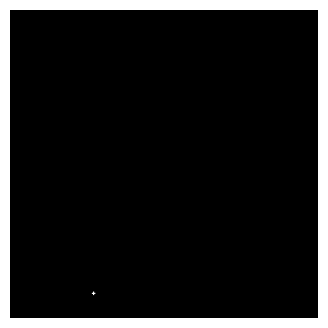

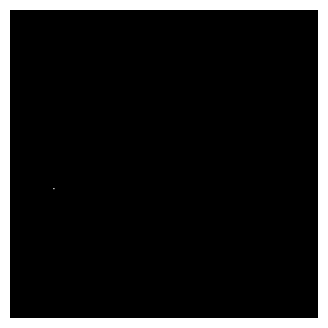

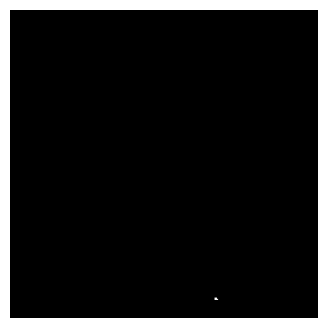

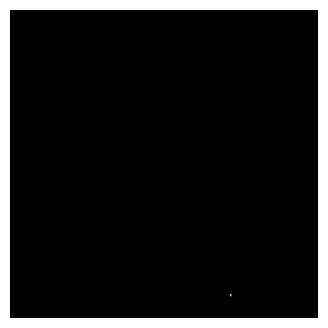

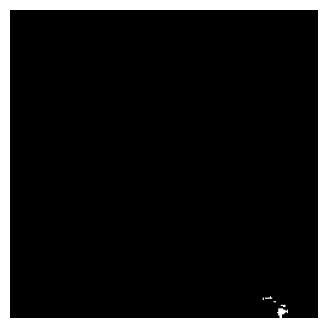

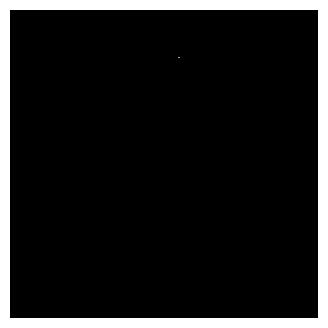

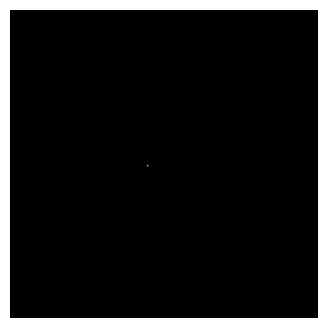

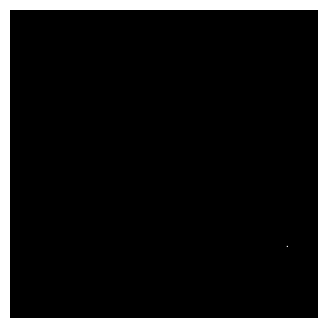

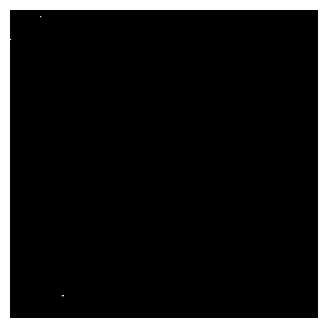

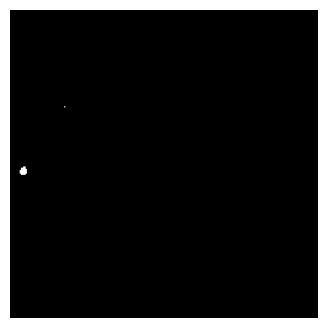

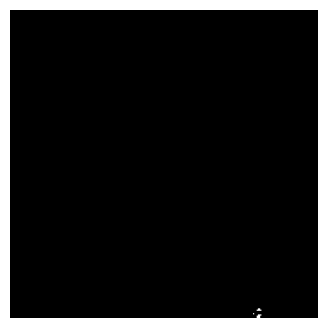

KeyboardInterrupt: 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import cv2
from glob import glob

MAX_PIXEL_VALUE = 65535

# Función para visualizar y guardar imágenes de cada parche
def visualize_masks_individually(patches_dir):
    patch_files = glob(os.path.join(patches_dir, '*.tif'))  # Buscar archivos TIFF en el directorio
    num_patches = len(patch_files)
    print(f"Número de parches encontrados: {num_patches}")
    for patch_file in patch_files:
        mask = rasterio.open(patch_file).read(1)
        plt.figure(figsize=(6,4))
        plt.imshow(mask, cmap='gray')
        plt.axis('off')
        plt.show()

# Llamar a la función con el directorio de parches
patches_dir = "./test/output/masks"  # Ajusta la ruta de los parches
visualize_masks_individually(patches_dir)


In [ ]:
import os
import numpy as np
import pandas as pd
import rasterio
import tensorflow
from glob import glob
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

MAX_PIXEL_VALUE = 65535

def get_img_762bands(path):
    img = rasterio.open(path).read((1, 2, 3)).transpose((1, 2, 0))
    ratio = np.divide(img[:,:,0], img[:,:,2], out=np.zeros_like(img[:,:,0], dtype=np.float32), where=(img[:,:,2] != 0))
    img = np.stack((img[:, :, 0], img[:, :, 1], img[:, :, 2], ratio), axis=-1)
    img = np.float32(img) / MAX_PIXEL_VALUE
    return img

class F1Score(tensorflow.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tensorflow.keras.metrics.Precision()
        self.recall = tensorflow.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Actualizamos las métricas de Precisión y Recall
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        # Obtenemos los valores de Precisión y Recall
        precision = self.precision.result()
        recall = self.recall.result()

        # Calculamos F1-Score con la fórmula: (2 * P * R) / (P + R + ε)
        f1_score = 2 * (precision * recall) / (precision + recall + tensorflow.keras.backend.epsilon())
        return f1_score

    def reset_state(self):
        # Reseteamos las métricas internas
        self.precision.reset_state()
        self.recall.reset_state()

# Inicializar las métricas
precision_metric = tensorflow.keras.metrics.Precision()
recall_metric = tensorflow.keras.metrics.Recall()
accuracy_metric = tensorflow.keras.metrics.CategoricalAccuracy()  # Para softmax (2 clases)
iou_metric = tensorflow.keras.metrics.IoU(num_classes=2, target_class_ids=[1])
f1_metric = F1Score()

MODEL_PATH = './UnetV2_final_model.h5'
model = load_model(MODEL_PATH)

patches_dir = "./test/output/patches"  # Ajusta la ruta de los parches
patch_files = glob(os.path.join(patches_dir, '*.tif'))  # Buscar archivos TIFF en el directorio
for path in tqdm(patch_files, total=len(patch_files), desc="Procesando imágenes"):

    # Cargar la imagen y la máscara
    image = get_img_762bands(path)
    mask = rasterio.open(path.replace('.tif','_Kumar-Roy.tif').replace('patches','masks')).read(1)

    # Convertir la máscara a formato one-hot encoding (256, 256, 2)
    mask_one_hot = to_categorical(mask, num_classes=2)

    # Aplanar la máscara para métricas basadas en píxeles
    mask_flat = np.argmax(mask_one_hot, axis=-1).flatten()

    # Realizar la inferencia
    pred = model.predict(np.expand_dims(image, axis=0), verbose=0)[0]  # Predicción
    pred_class = np.argmax(pred, axis=-1).astype(np.uint8).flatten()  # Convertir y aplanar

    # Actualizar métricas
    precision_metric.update_state(mask_flat, pred_class)
    recall_metric.update_state(mask_flat, pred_class)
    accuracy_metric.update_state(mask_one_hot, pred)  # Usa formato one-hot
    iou_metric.update_state(mask_flat, pred_class)
    f1_metric.update_state(mask_flat, pred_class)

# Obtener los resultados finales
precision = precision_metric.result().numpy()
recall = recall_metric.result().numpy()
accuracy = accuracy_metric.result().numpy()
iou = iou_metric.result().numpy()
f1_score = f1_metric.result().numpy()

# Mostrar los resultados
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("IoU:", iou)
print("F1-Score:", f1_score)

Procesando imágenes: 100%|██████████| 1425/1425 [07:55<00:00,  3.00it/s]


Precision: 0.95077807
Recall: 0.9047658
Accuracy: 0.9999669
IoU: 0.8642828
F1-Score: 0.9272014


In [ ]:
import os
import numpy as np
from glob import glob
import rasterio
from tqdm import tqdm

# Directorio de los parches (imágenes)
patches_dir = "./test/output/patches"  # Ajusta la ruta si es necesario
patch_files = glob(os.path.join(patches_dir, '*.tif'))

# Contadores para cada grupo de píxeles con valor 1
group_counts = {"1-130": 0, "131-618": 0, "618+": 0}

# Procesar cada parche
for path in tqdm(patch_files, total=len(patch_files), desc="Procesando imágenes"):
    # Generar la ruta de la máscara correspondiente
    mask_path = path.replace('.tif', '_Kumar-Roy.tif').replace('patches', 'masks')

    # Cargar la máscara (se asume que tiene una sola banda)
    mask = rasterio.open(mask_path).read(1)

    # Contar los píxeles con valor 1
    ones_count = np.sum(mask == 1)

    # Clasificar la máscara según el número de pixeles con valor 1
    if 1 <= ones_count <= 130:
        group_counts["1-130"] += 1
    elif 131 <= ones_count <= 618:
        group_counts["131-618"] += 1
    elif ones_count > 618:
        group_counts["618+"] += 1
    # En caso de que no se encuentren píxeles con valor 1 no se cuenta en ningún grupo,
    # pero podrías agregar una condición extra si lo deseas.

# Mostrar resultados
print("Distribución de las máscaras por grupos de píxeles con valor 1:")
for group, count in group_counts.items():
    print(f"Grupo {group}: {count} máscaras")

Procesando imágenes: 100%|██████████| 1425/1425 [00:03<00:00, 416.04it/s]

Distribución de las máscaras por grupos de píxeles con valor 1:
Grupo 1-130: 1389 máscaras
Grupo 131-618: 35 máscaras
Grupo 618+: 1 máscaras


In [ ]:
import os
import numpy as np
import pandas as pd
import rasterio
import tensorflow as tf
from glob import glob
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

# Define el valor máximo de píxel según tu dataset (por ejemplo 255.0 o 65535.0)
MAX_PIXEL_VALUE = 65535

def get_img_762bands(path):
    # Esta función carga los 3 canales (1,2,3) y calcula adicionalmente el cociente entre canal 1 y canal 3,
    # generando una imagen con 4 canales; luego normaliza la imagen.
    img = rasterio.open(path).read((1, 2, 3)).transpose((1, 2, 0))
    ratio = np.divide(
        img[:, :, 0],
        img[:, :, 2],
        out=np.zeros_like(img[:, :, 0], dtype=np.float32),
        where=(img[:, :, 2] != 0)
    )
    img = np.stack((img[:, :, 0], img[:, :, 1], img[:, :, 2], ratio), axis=-1)
    img = np.float32(img) / MAX_PIXEL_VALUE
    return img

# Definición del métrico F1Score personalizado
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Actualizamos las métricas de Precisión y Recall
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        # Obtenemos los valores y calculamos el F1-Score: 2*(P*R)/(P+R+epsilon)
        precision = self.precision.result()
        recall = self.recall.result()
        f1_score = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
        return f1_score

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

# Creamos un diccionario que contendrá para cada grupo instancias separadas de cada métrica.
group_metrics = {
    "1-130": {
        "precision": tf.keras.metrics.Precision(),
        "recall": tf.keras.metrics.Recall(),
        "accuracy": tf.keras.metrics.CategoricalAccuracy(),  # Emplea formato one-hot
        "iou": tf.keras.metrics.IoU(num_classes=2, target_class_ids=[1]),
        "f1": F1Score()
    },
    "131-618": {
        "precision": tf.keras.metrics.Precision(),
        "recall": tf.keras.metrics.Recall(),
        "accuracy": tf.keras.metrics.CategoricalAccuracy(),
        "iou": tf.keras.metrics.IoU(num_classes=2, target_class_ids=[1]),
        "f1": F1Score()
    },
    "618+": {
        "precision": tf.keras.metrics.Precision(),
        "recall": tf.keras.metrics.Recall(),
        "accuracy": tf.keras.metrics.CategoricalAccuracy(),
        "iou": tf.keras.metrics.IoU(num_classes=2, target_class_ids=[1]),
        "f1": F1Score()
    }
}

# Cargar el modelo entrenado
MODEL_PATH = './UnetV2_final_model.h5'
model = load_model(MODEL_PATH)

# Directorio que contiene los parches (imágenes)
patches_dir = "./test/output/patches"  # Ajusta la ruta según tu estructura de directorios
patch_files = glob(os.path.join(patches_dir, '*.tif'))  # Se buscan archivos TIFF

# Bucle de procesamiento de cada imagen
for path in tqdm(patch_files, total=len(patch_files), desc="Procesando imágenes"):
    # Cargar la imagen
    image = get_img_762bands(path)

    # Generar la ruta de la máscara correspondiente y cargarla
    mask_path = path.replace('.tif','_Kumar-Roy.tif').replace('patches','masks')
    mask = rasterio.open(mask_path).read(1)

    # Contar los píxeles con valor 1 en la máscara
    ones_count = np.sum(mask == 1)

    # Clasificar la imagen según número de píxeles 1:
    # Si no hay píxeles con 1, se salta la imagen
    if ones_count < 1:
        continue
    elif ones_count <= 130:
        group = "1-130"
    elif ones_count <= 618:
        group = "131-618"
    else:  # ones_count > 618
        group = "618+"

    # Convertir la máscara a formato one-hot (suponiendo 2 clases) y aplanar (para métricas basadas en píxeles)
    mask_one_hot = to_categorical(mask, num_classes=2)
    mask_flat = np.argmax(mask_one_hot, axis=-1).flatten()

    # Realizar la predicción del modelo
    pred = model.predict(np.expand_dims(image, axis=0), verbose=0)[0]  # Predicción
    pred_class = np.argmax(pred, axis=-1).astype(np.uint8).flatten()      # Convertir a clases y aplanar

    # Actualizar las métricas correspondientes al grupo identificado
    group_metrics[group]["precision"].update_state(mask_flat, pred_class)
    group_metrics[group]["recall"].update_state(mask_flat, pred_class)
    group_metrics[group]["accuracy"].update_state(mask_one_hot, pred)  # Usa la versión one-hot para accuracy
    group_metrics[group]["iou"].update_state(mask_flat, pred_class)
    group_metrics[group]["f1"].update_state(mask_flat, pred_class)

# Mostrar los resultados finales para cada grupo
print("\n--- Resultados por grupo ---")
for group, metrics in group_metrics.items():
    precision = metrics["precision"].result().numpy()
    recall = metrics["recall"].result().numpy()
    accuracy = metrics["accuracy"].result().numpy()
    iou = metrics["iou"].result().numpy()
    f1_score = metrics["f1"].result().numpy()

    print(f"\nGrupo {group}:")
    print(f"    Precision: {precision:.4f}")
    print(f"    Recall:    {recall:.4f}")
    print(f"    Accuracy:  {accuracy:.4f}")
    print(f"    IoU:       {iou:.4f}")
    print(f"    F1-Score:  {f1_score:.4f}")

Procesando imágenes: 100%|██████████| 1425/1425 [08:19<00:00,  2.85it/s]



--- Resultados por grupo ---

Grupo 1-130:
    Precision: 0.9460
    Recall:    0.9076
    Accuracy:  1.0000
    IoU:       0.8629
    F1-Score:  0.9264

Grupo 131-618:
    Precision: 0.9563
    Recall:    0.8958
    Accuracy:  0.9994
    IoU:       0.8606
    F1-Score:  0.9251

Grupo 618+:
    Precision: 0.9854
    Recall:    0.9560
    Accuracy:  0.9994
    IoU:       0.9426
    F1-Score:  0.9704


https://drive.google.com/file/d/1-PYuPextHpPf_amWALDdJFpRmaspBWOO/view?usp=drive_link

In [ ]:
import gdown

# ID del archivo en Google Drive
file_id = "1-PYuPextHpPf_amWALDdJFpRmaspBWOO"
# URL de descarga
url = f"https://drive.google.com/uc?id={file_id}"
# Nombre del archivo local
output = "UnetV2_final_model.h5"  # Cambia la extensión según el archivo

# Descargar el archivo
gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1-PYuPextHpPf_amWALDdJFpRmaspBWOO
From (redirected): https://drive.google.com/uc?id=1-PYuPextHpPf_amWALDdJFpRmaspBWOO&confirm=t&uuid=85a86de0-0335-4a85-ac27-eb8c36ceb423
To: /content/UnetV2_final_model.h5
100%|██████████| 583M/583M [00:08<00:00, 67.9MB/s]


'UnetV2_final_model.h5'

In [ ]:
# ID del archivo en Google Drive
file_id = "1-RmdvyB2nrcc0l6X6ls0y6k9XMu_1ty2"
# URL de descarga
url = f"https://drive.google.com/uc?id={file_id}"
# Nombre del archivo local
output = "UnetV2_final_model_transfer_learning.h5"  # Cambia la extensión según el archivo

# Descargar el archivo
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1-RmdvyB2nrcc0l6X6ls0y6k9XMu_1ty2
From (redirected): https://drive.google.com/uc?id=1-RmdvyB2nrcc0l6X6ls0y6k9XMu_1ty2&confirm=t&uuid=d74a92f5-78f6-4b1b-9523-444fad36b735
To: /content/UnetV2_final_model_transfer_learning.h5
100%|██████████| 583M/583M [00:08<00:00, 65.7MB/s]


'UnetV2_final_model_transfer_learning.h5'

Clasificando imágenes: 100%|██████████| 1425/1425 [00:03<00:00, 425.26it/s]


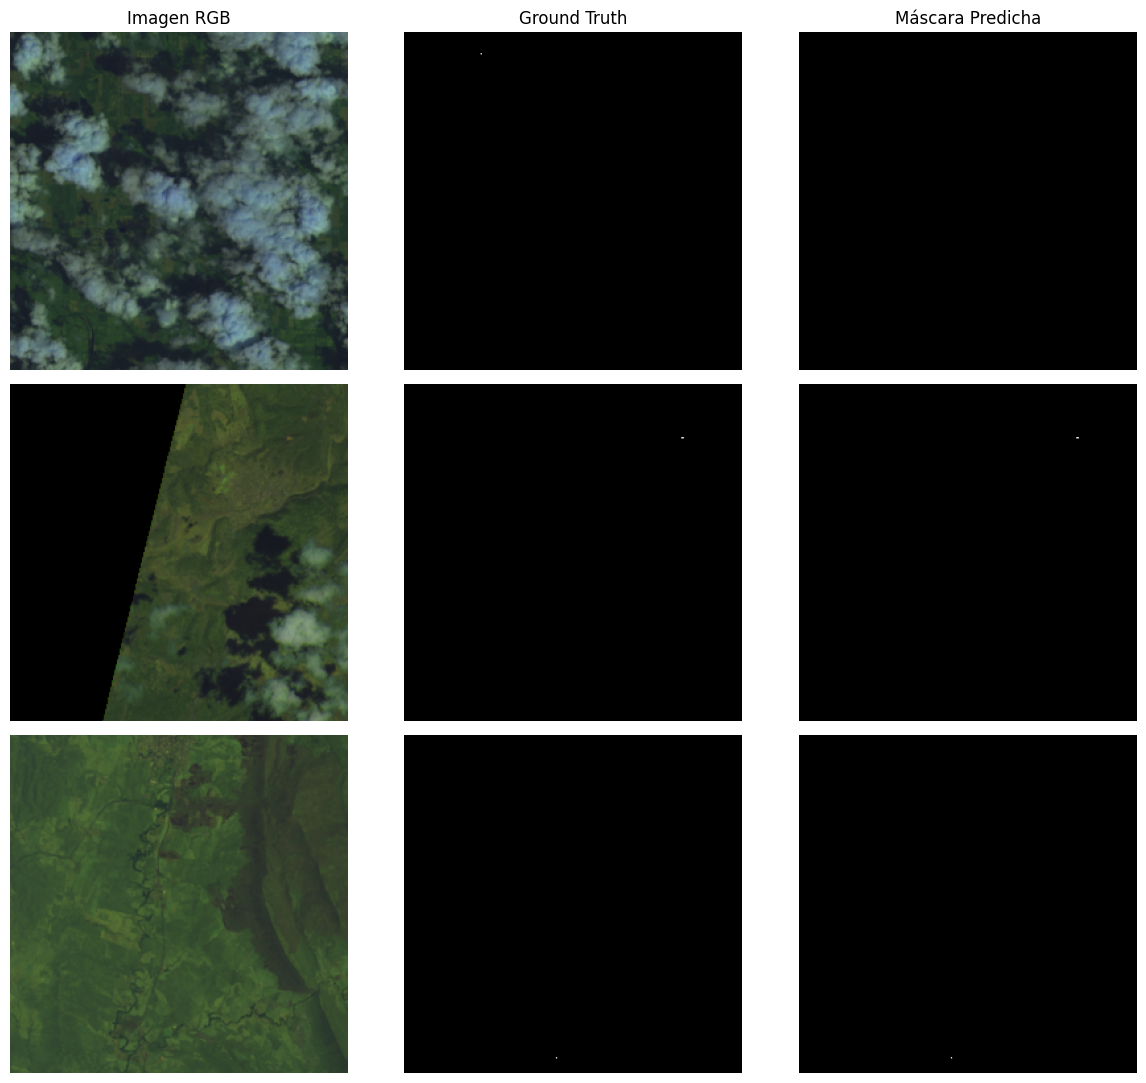

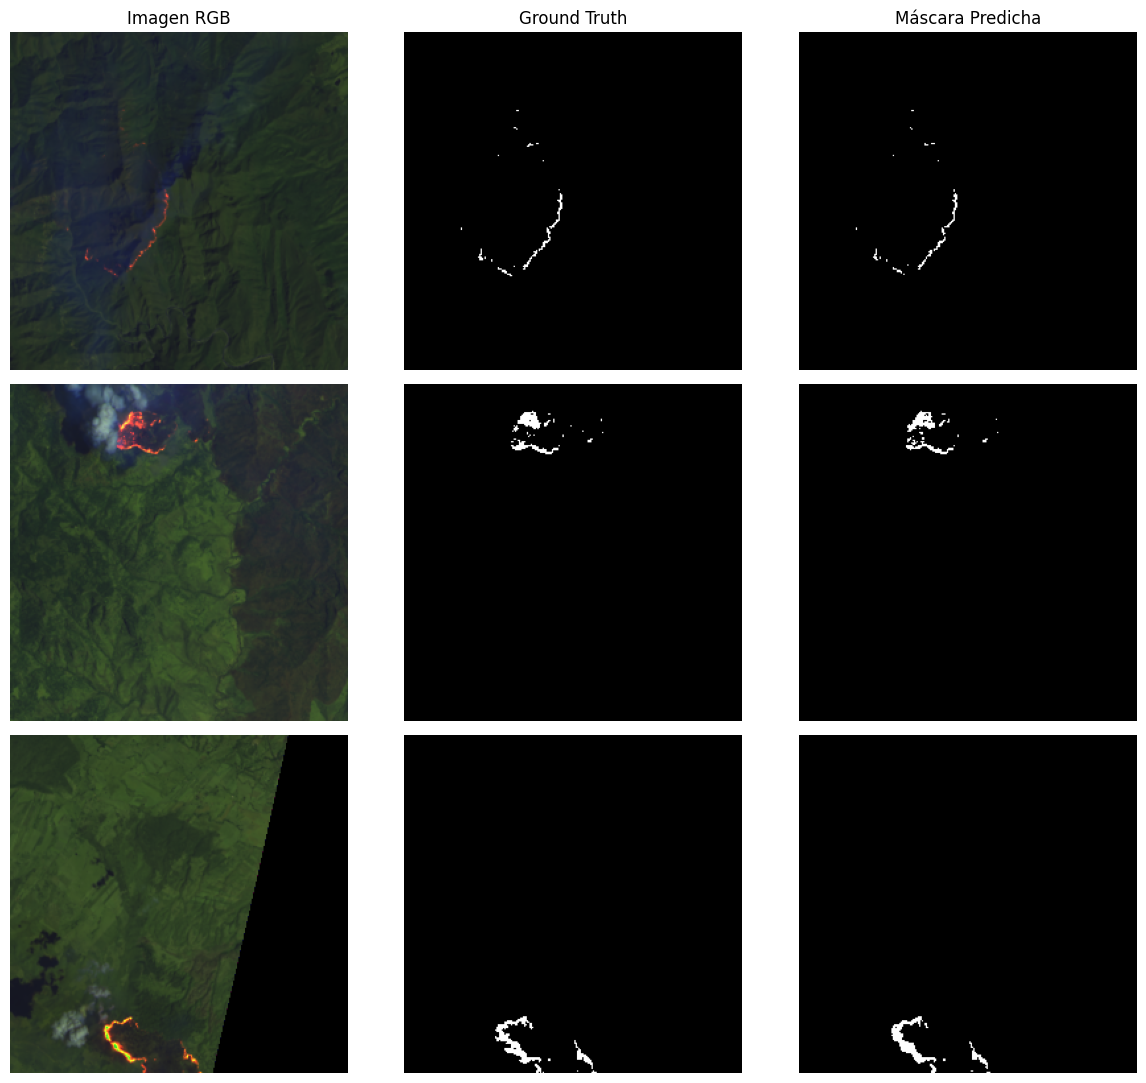

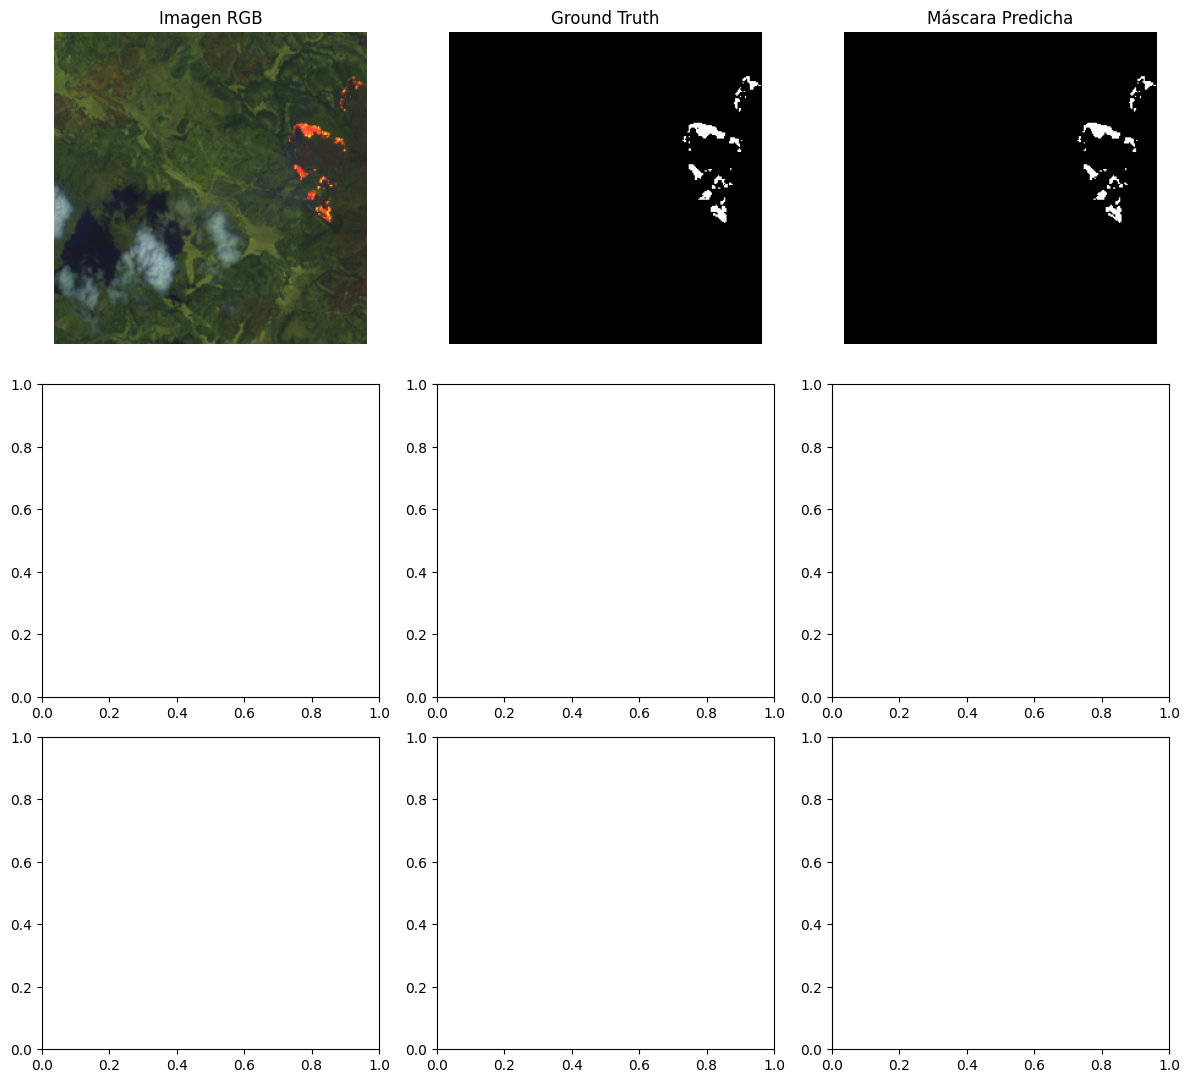

In [ ]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from glob import glob
import rasterio
from tqdm import tqdm
from tensorflow.keras.models import load_model

# Cargar el modelo
MODEL_PATH = './UnetV2_final_model.h5'
model = load_model(MODEL_PATH)

# Directorio de los parches
patches_dir = "./test/output/patches"  # Ajusta la ruta si es necesario
patch_files = glob(os.path.join(patches_dir, '*.tif'))

# Diccionario para almacenar las rutas por grupo de píxeles con valor 1
groups = {"1-130": [], "131-618": [], "618+": []}

# Clasificación de cada imagen en función de la cantidad de píxeles (con valor 1) en su máscara
for path in tqdm(patch_files, total=len(patch_files), desc="Clasificando imágenes"):
    # Generar la ruta de la máscara correspondiente
    mask_path = path.replace('.tif', '_Kumar-Roy.tif').replace('patches', 'masks')

    # Cargar la máscara (se asume una única banda)
    mask = rasterio.open(mask_path).read(1)

    # Contar los píxeles con valor 1
    ones_count = np.sum(mask == 1)

    # Clasificar la imagen según la cantidad de píxeles en la máscara
    if 1 <= ones_count <= 130:
        groups["1-130"].append(path)
    elif 131 <= ones_count <= 618:
        groups["131-618"].append(path)
    elif ones_count > 618:
        groups["618+"].append(path)
    # Si no hay píxeles con valor 1, la imagen no queda clasificada (podrías agregar una categoría extra)

# Visualización de 3 imágenes aleatorias por cada grupo
for group_label, file_list in groups.items():
    if not file_list:
        print(f"No se encontraron imágenes para el grupo {group_label}.")
        continue

    # Seleccionar 3 imágenes aleatorias (o todas en caso de que haya menos)
    selected_paths = random.sample(file_list, min(3, len(file_list)))

    # Crear figura con 3 filas y 3 columnas:
    # Columna 0 -> Imagen RGB, Columna 1 -> Máscara ground truth, Columna 2 -> Máscara predicha
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
    #fig.suptitle(f"Grupo {group_label}", fontsize=16)

    for i, path in enumerate(selected_paths):
        # Cargar la imagen y su máscara ground truth
        image = get_img_762bands(path)
        mask_path = path.replace('.tif', '_Kumar-Roy.tif').replace('patches', 'masks')
        gt_mask = rasterio.open(mask_path).read(1)

        # Obtener la predicción del modelo
        pred = model.predict(np.expand_dims(image, axis=0), verbose=0)[0]
        pred_mask = np.argmax(pred, axis=-1)

        # Visualización: Imagen RGB
        ax = axes[i, 0]
        ax.imshow(image[:,:,:3])
        if i==0:
            ax.set_title("Imagen RGB")
        ax.axis("off")

        # Visualización: Máscara ground truth
        ax = axes[i, 1]
        ax.imshow(gt_mask, cmap="gray")
        if i==0:
            ax.set_title("Ground Truth")
        ax.axis("off")

        # Visualización: Máscara predicha
        ax = axes[i, 2]
        ax.imshow(pred_mask, cmap="gray")
        if i==0:
            ax.set_title("Máscara Predicha")
        ax.axis("off")

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)  # Ajuste para el título general
    plt.savefig(group_label)
    plt.show()

Clasificando imágenes: 100%|██████████| 1425/1425 [00:03<00:00, 423.28it/s]


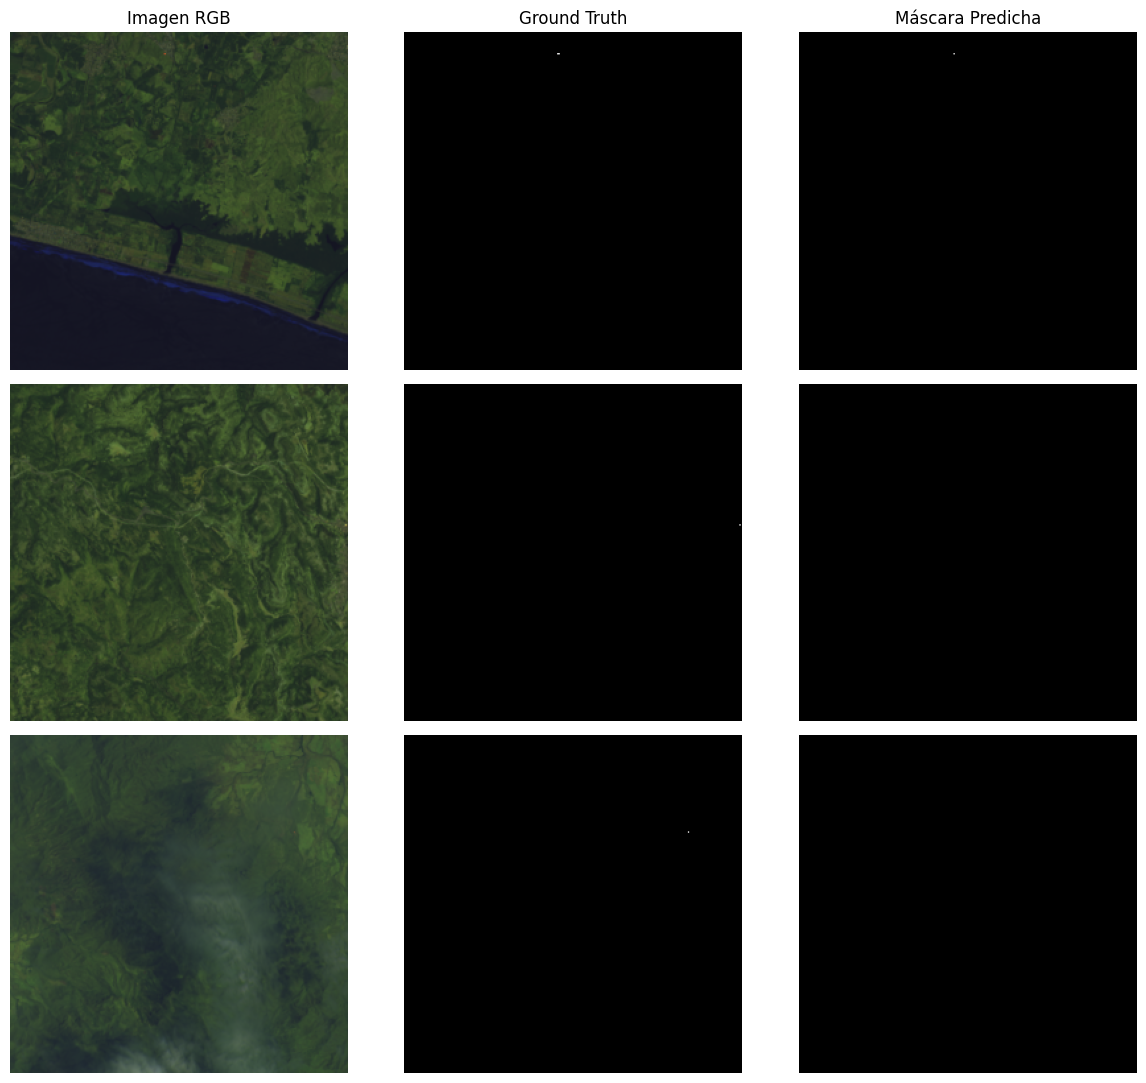

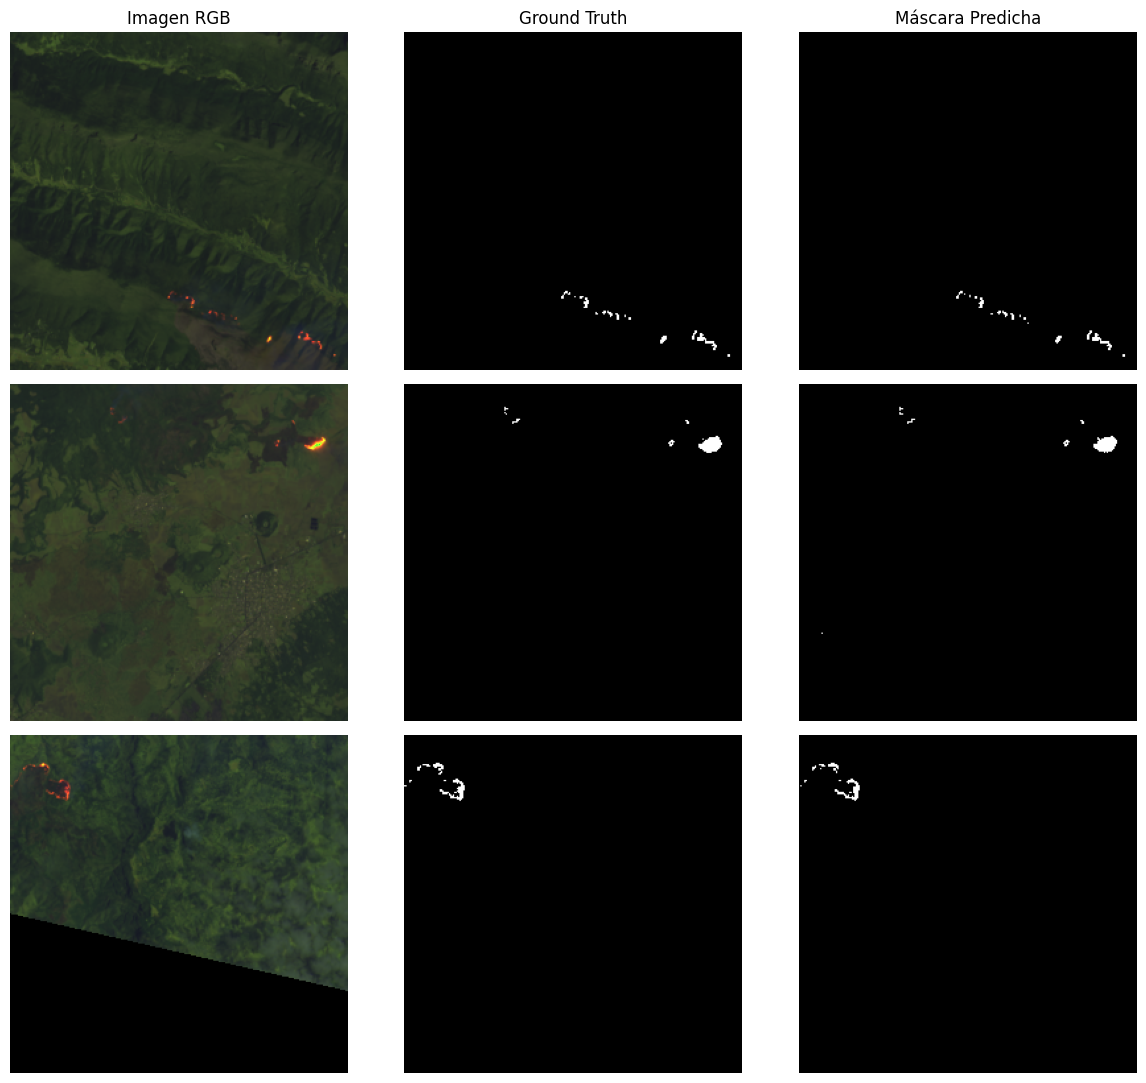

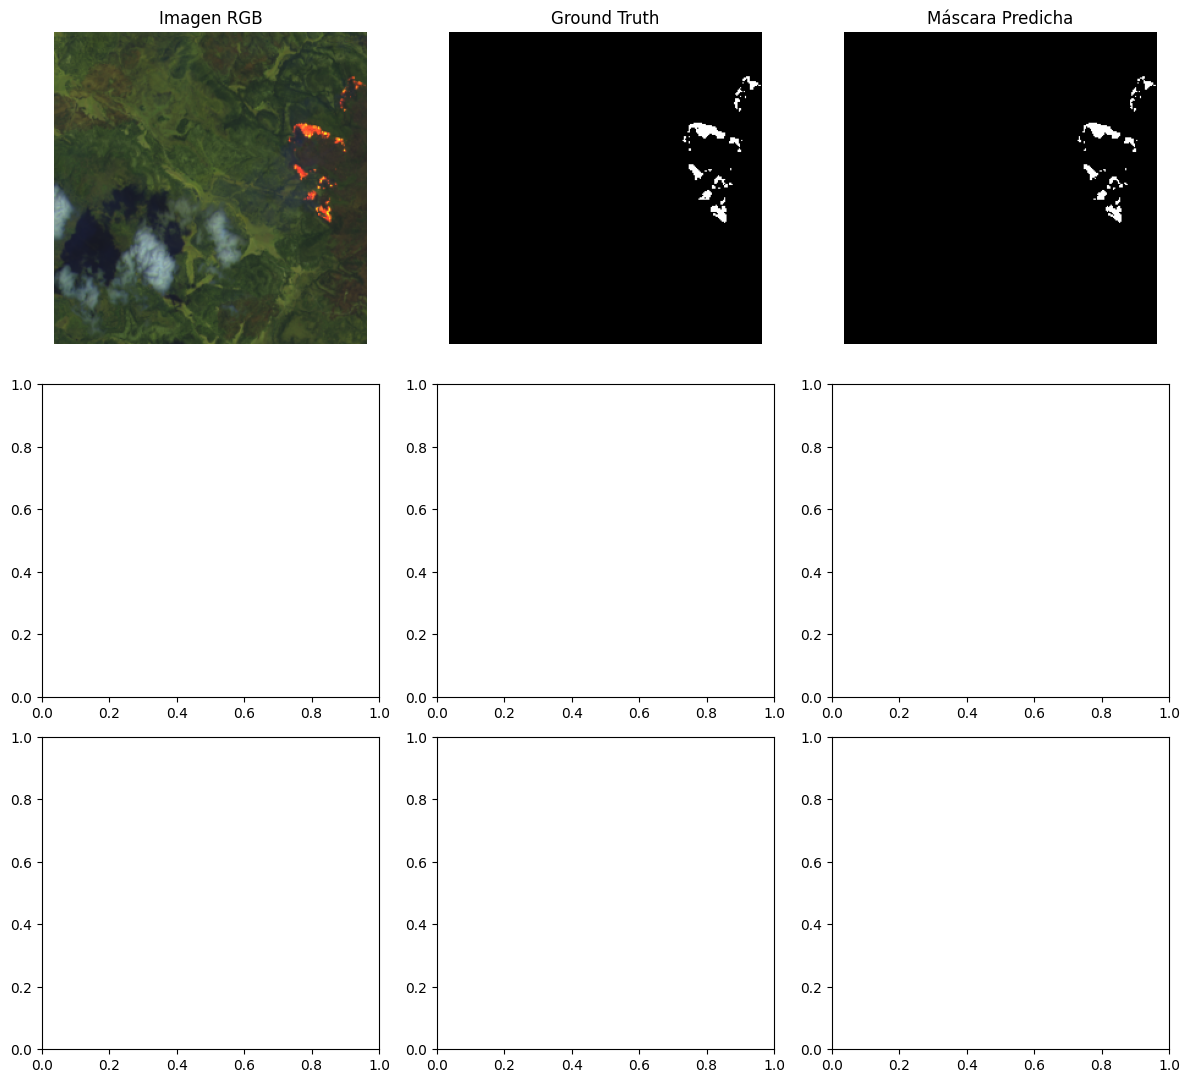

In [ ]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from glob import glob
import rasterio
from tqdm import tqdm
from tensorflow.keras.models import load_model

# Cargar el modelo
MODEL_PATH = './UnetV2_final_model_transfer_learning.h5'
model = load_model(MODEL_PATH)

# Directorio de los parches
patches_dir = "./test/output/patches"  # Ajusta la ruta si es necesario
patch_files = glob(os.path.join(patches_dir, '*.tif'))

# Diccionario para almacenar las rutas por grupo de píxeles con valor 1
groups = {"1-130": [], "131-618": [], "618+": []}

# Clasificación de cada imagen en función de la cantidad de píxeles (con valor 1) en su máscara
for path in tqdm(patch_files, total=len(patch_files), desc="Clasificando imágenes"):
    # Generar la ruta de la máscara correspondiente
    mask_path = path.replace('.tif', '_Kumar-Roy.tif').replace('patches', 'masks')

    # Cargar la máscara (se asume una única banda)
    mask = rasterio.open(mask_path).read(1)

    # Contar los píxeles con valor 1
    ones_count = np.sum(mask == 1)

    # Clasificar la imagen según la cantidad de píxeles en la máscara
    if 1 <= ones_count <= 130:
        groups["1-130"].append(path)
    elif 131 <= ones_count <= 618:
        groups["131-618"].append(path)
    elif ones_count > 618:
        groups["618+"].append(path)
    # Si no hay píxeles con valor 1, la imagen no queda clasificada (podrías agregar una categoría extra)

# Visualización de 3 imágenes aleatorias por cada grupo
for group_label, file_list in groups.items():
    if not file_list:
        print(f"No se encontraron imágenes para el grupo {group_label}.")
        continue

    # Seleccionar 3 imágenes aleatorias (o todas en caso de que haya menos)
    selected_paths = random.sample(file_list, min(3, len(file_list)))

    # Crear figura con 3 filas y 3 columnas:
    # Columna 0 -> Imagen RGB, Columna 1 -> Máscara ground truth, Columna 2 -> Máscara predicha
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
    #fig.suptitle(f"Grupo {group_label}", fontsize=16)

    for i, path in enumerate(selected_paths):
        # Cargar la imagen y su máscara ground truth
        image = get_img_762bands(path)
        mask_path = path.replace('.tif', '_Kumar-Roy.tif').replace('patches', 'masks')
        gt_mask = rasterio.open(mask_path).read(1)

        # Obtener la predicción del modelo
        pred = model.predict(np.expand_dims(image, axis=0), verbose=0)[0]
        pred_mask = np.argmax(pred, axis=-1)

        # Visualización: Imagen RGB
        ax = axes[i, 0]
        ax.imshow(image[:,:,:3])
        if i==0:
            ax.set_title("Imagen RGB")
        ax.axis("off")

        # Visualización: Máscara ground truth
        ax = axes[i, 1]
        ax.imshow(gt_mask, cmap="gray")
        if i==0:
            ax.set_title("Ground Truth")
        ax.axis("off")

        # Visualización: Máscara predicha
        ax = axes[i, 2]
        ax.imshow(pred_mask, cmap="gray")
        if i==0:
            ax.set_title("Máscara Predicha")
        ax.axis("off")

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)  # Ajuste para el título general
    plt.savefig(group_label+"_T")
    plt.show()

(256, 256, 4)


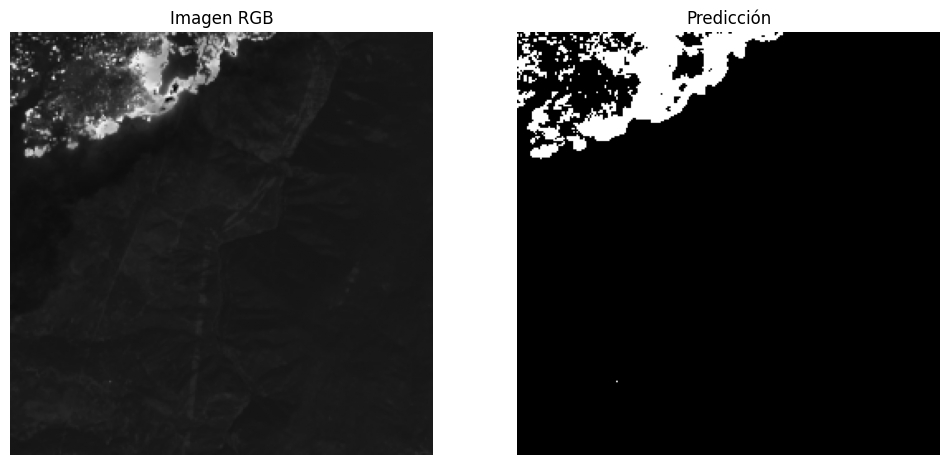

In [ ]:
from tensorflow.keras.models import load_model
MODEL_PATH = './Unet_small_final_model.h5'
IMAGE_PATH = './test/output/patches/LC08_L1TP_044032_20181108_20181108_01_RT_p00396.tif'
model = load_model(MODEL_PATH)
src = rasterio.open(IMAGE_PATH)
img = src.read((1, 2, 3)).transpose((1, 2, 0))

# Calculo del Active Fire Index
ratio = np.divide(img[:,:,0], img[:,:,2], out=np.zeros_like(img[:,:,0], dtype=np.float32), where=(img[:,:,2] != 0))
img = np.stack((img[:, :, 0], img[:, :, 1], img[:, :, 2], ratio), axis=-1)
img = np.float32(img) / MAX_PIXEL_VALUE
pred = model.predict(np.expand_dims(img, axis=0), verbose=0)[0]
pred_class = np.argmax(pred, axis=-1)
plt.figure(figsize=(12, 8))
print(img.shape)

# Mostrar predicción
plt.subplot(1, 2, 1)
plt.imshow(img[:,:,3])
plt.title('Imagen RGB')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(pred_class, cmap='gray')
plt.title('Predicción')
plt.axis('off')

plt.show()

# DATASET INCENDIOS MEXICO 2021

In [ ]:
import requests

url = "https://idefor.cnf.gob.mx/layers/download/geonode:_2021incendiosforestales/ESRI%20Shapefile"

output_path = "incendios_forestales_2021.zip"

response = requests.get(url)

if response.status_code == 200:
    with open(output_path, "wb") as f:
        f.write(response.content)
    print(f"Archivo descargado correctamente en: {output_path}")
else:
    print(f"Error al descargar el archivo: {response.status_code}")

Archivo descargado correctamente en: incendios_forestales_2021.zip


In [ ]:
import zipfile

zip_path = "incendios_forestales_2021.zip"
# Descomprimir el archivo
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('./')

print(f"Archivos descomprimididos")

Archivos descomprimididos


In [ ]:
import geopandas as gpd

# Cargar el shapefile
shapefile_path = './_2021incendiosforestales_b93HzOS.shp'
gdf = gpd.read_file(shapefile_path)

gdf.head()

,ID,CLAVEINC,ESTADO,CLAVEMUN,MUNICIPIO,PREDIO,CAUSA,FECHAINIC,FECHALIQ,TIPOINC,...,ANP_HA,TIPVEG,TIPIMPAC,ARBOR_HA,RENUEV_HA,ARBUSTI_HA,HERBAC_HA,HOJAR_HA,AREA_HA,geometry
0,34,21-01-0034,Aguascalientes,3,Calvillo,Terrero del Refugio,Desconocidas,2021-06-09,2021-06-10,Superficial,...,0.0,Bosque de Encino,Impacto Minimo,0.0,0.0,2.230,20.050,0.0,22.280,"MULTIPOLYGON Z (((-102.84414 21.8489 0, -102.8..."
1,32,21-01-0032,Aguascalientes,11,San Francisco de los Romo,Ejido de Uso Comun Chicalote,Desconocidas,2021-05-03,2021-05-03,Superficial,...,0.0,Matorral Crasicaule,Impacto Minimo,0.0,0.0,2.660,23.920,0.0,26.580,"MULTIPOLYGON Z (((-102.24306 22.01937 0, -102...."
2,33,21-01-0033,Aguascalientes,1,Aguascalientes,Cieneguilla,Desconocidas,2021-05-02,2021-05-02,Superficial,...,0.0,Pastizal Natural,Impacto Minimo,0.0,0.0,0.230,4.370,0.0,4.600,"POLYGON Z ((-102.45164 21.7138 0, -102.45146 2..."
3,28,21-01-0028,Aguascalientes,1,Aguascalientes,San Nicolas de Arriba,Actividades ilicitas,2021-04-17,2021-04-17,Superficial,...,0.0,Matorral Crasicaule,Impacto Minimo,0.0,0.0,0.361,3.251,0.0,3.612,"POLYGON Z ((-102.21727 21.9619 0, -102.21707 2..."
4,21,21-01-0021,Aguascalientes,1,Aguascalientes,Los Coyotes,Actividades ilicitas,2021-04-09,2021-04-09,Superficial,...,0.0,Pastizal Natural,Impacto Minimo,0.0,0.0,1.846,16.619,0.0,18.465,"MULTIPOLYGON Z (((-102.23217 21.7574 0, -102.2..."


In [ ]:
gdf.columns

Index(['ID', 'CLAVEINC', 'ESTADO', 'CLAVEMUN', 'MUNICIPIO', 'PREDIO', 'CAUSA',
       'FECHAINIC', 'FECHALIQ', 'TIPOINC', 'ANP', 'ANP_HA', 'TIPVEG',
       'TIPIMPAC', 'ARBOR_HA', 'RENUEV_HA', 'ARBUSTI_HA', 'HERBAC_HA',
       'HOJAR_HA', 'AREA_HA', 'geometry'],
      dtype='object')

In [ ]:
gdf_filtered=gdf[gdf['TIPIMPAC']=='Impacto Severo']

In [ ]:
gdf_filtered[['geometry']]

,geometry
1061,"POLYGON Z ((-93.88787 16.43481 0, -93.89366 16..."
1103,"POLYGON Z ((-93.88538 16.34218 0, -93.8848 16...."
1106,"POLYGON Z ((-94.10769 16.5402 0, -94.10428 16...."
1214,"POLYGON Z ((-93.0559 16.80396 0, -93.05592 16...."
1223,"POLYGON Z ((-93.14633 16.70786 0, -93.14636 16..."
1294,"POLYGON Z ((-93.05781 16.76102 0, -93.05673 16..."
1296,"POLYGON Z ((-93.04432 16.75081 0, -93.04722 16..."
1390,"POLYGON Z ((-107.08581 27.06474 0, -107.08599 ..."
1946,"MULTIPOLYGON Z (((-107.48889 27.98135 0, -107...."
1974,"MULTIPOLYGON Z (((-100.27803 25.31643 0, -100...."


In [ ]:
def extraer_coord(geom):
    """
    Retorna un tuple (longitud, latitud) usando:
      - el centroide del polígono (ignorando la altitud),
      - si falla, toma la primera coordenada del anillo exterior.
    """
    try:
        # Opción 1: Usar el centroide (centroid ignora la dimensión Z)
        c = geom.centroid
        return (c.x, c.y)
    except Exception:
        # Opción 2: Extraer la primera coordenada del anillo exterior
        if geom.geom_type == 'Polygon':
            return (geom.exterior.coords[0][0], geom.exterior.coords[0][1])
        elif geom.geom_type == 'MultiPolygon':
            # Tomamos la primera coordenada del primer polígono
            return (geom.geoms[0].exterior.coords[0][0], geom.geoms[0].exterior.coords[0][1])
        else:
            return None

# Aplicar la función para crear la columna COORDS
gdf_filtered["COORDS"] = gdf_filtered.geometry.apply(extraer_coord)

/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
gdf_filtered[['FECHAINIC', 'AREA_HA', 'COORDS']].sort_values(by='AREA_HA', ascending=False)


,FECHAINIC,AREA_HA,COORDS
2329,2021-04-16,19102.320,"(-101.2495363010519, 18.16952338165493)"
5994,2021-03-16,10070.376,"(-100.35779401569437, 25.357774409327785)"
1946,2021-06-05,4918.000,"(-107.44840168645038, 27.994091382348508)"
1974,2021-03-16,3630.000,"(-100.46977265845848, 25.37182449085829)"
5152,2021-04-23,1770.210,"(-103.24746699060405, 18.524831834337764)"
1061,2021-03-06,1644.309,"(-93.8744155177887, 16.449217616212525)"
5317,2021-04-12,1563.290,"(-102.42562922088787, 19.615330881675035)"
6128,2021-04-20,1065.000,"(-97.23793077534967, 16.63422087391289)"
5030,2021-04-20,996.000,"(-100.20813215329905, 19.257104270039623)"
2522,2021-03-27,950.949,"(-100.66297369318087, 20.265674461762202)"
